[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,MA,10_ma,27_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,
1993-11-12,26.173452,46.593750,46.750000,46.437500,46.468750,108200,45.219219,46.390625,46.472222,-1.0,0.004717,-0.004717
1993-11-15,26.155903,46.562500,46.687500,46.437500,46.687500,243300,45.230781,46.350000,46.493056,-1.0,0.004043,-0.004049
1993-11-16,26.278763,46.781250,46.812500,46.468750,46.656250,492600,45.242969,46.334375,46.519676,-1.0,0.008760,-0.008728
1993-11-17,26.138334,46.531250,46.812500,46.406250,46.812500,39600,45.251562,46.353125,46.533565,-1.0,0.003369,-0.003431
1993-11-18,26.068127,46.406250,46.562500,46.281250,46.468750,240800,45.258594,46.409375,46.540509,-1.0,0.000674,-0.000754
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-06,691.809998,691.809998,692.320007,687.780029,687.929993,69273800,628.754400,687.295996,683.890001,1.0,13.917736,-0.213160
2026-01-07,689.580017,689.580017,693.960022,689.320007,692.190002,75588300,629.382401,687.770996,684.256669,1.0,13.869650,-0.215696
2026-01-08,689.510010,689.510010,690.619995,687.489990,688.820007,64019200,629.959550,687.925995,684.483335,1.0,13.868140,-0.215776


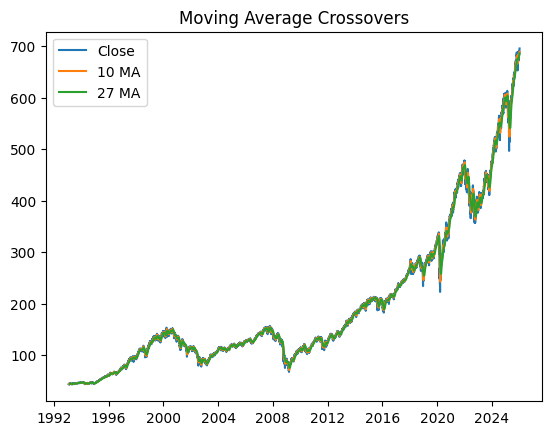

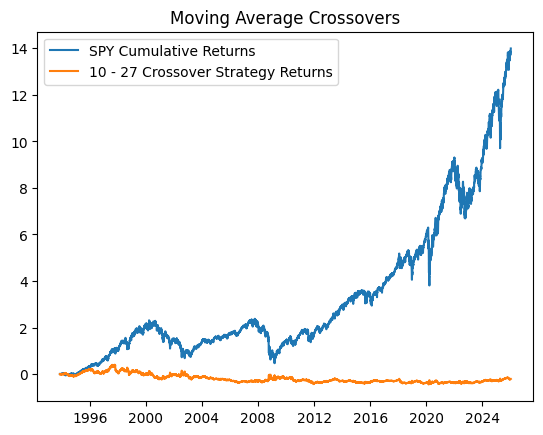

In [32]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

TICKER = 'SPY' # name of the ticker
WINDOW = 200 # global variable for moving average window size
FAST = 10
SLOW = 27
LOOKBACK = 10000 # number of days to lookback at 

def get_data(): # download data 
  df = yf.download(TICKER, period="max", group_by="column", auto_adjust=False)

    # Flatten MultiIndex columns if yfinance returns them
  if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

    # Make sure Close is a 1D numeric Series
    close = df['Close'].astype(float)
    df['MA'] = close.rolling(WINDOW).mean()

  return df.iloc[-LOOKBACK:,:] # return only the last LOOKBACK days, interested dataset 

# adding fast ans slow collumns based on the chosen window sizes
def add_moving_averages(df, fast, slow):
  df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean() # add fast moving average
  df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean() # add slow moving average



  plt.plot(df['Close'])
  plt.plot(df[f'{FAST}_ma'])
  plt.plot(df[f'{SLOW}_ma'])

  plt.legend(['Close', f'{FAST} MA', f'{SLOW} MA'])
  plt.title('Moving Average Crossovers')

  return df.dropna()

def add_strategy(df, fast, slow):
  # when fast is above slow, we are in a long position (1), otherwise short position (-1) 
  df['Strategy'] = np.where(df[f'{fast}_ma']  > df[f'{slow}_ma'], 1, -1)
  df['Strategy'] = df['Strategy'].shift(1) # shift by 1 to avoid lookahead bias
  return df

def test_strategy(df, ticker, fast, slow):
  df['Asset_Returns'] = np.cumprod(1 + df['Close'].pct_change()) - 1 
  df['Strategy_Returns'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) - 1

  

  plt.figure()
  plt.plot(df['Asset_Returns'])
  plt.plot(df['Strategy_Returns'])

  plt.legend([f'{TICKER} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns'])
  plt.title('Moving Average Crossovers')

  return df.dropna()

df = get_data()
df = add_moving_averages(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df, TICKER, FAST, SLOW)

df


Text(0.5, 1.0, 'Moving Average Crossovers')

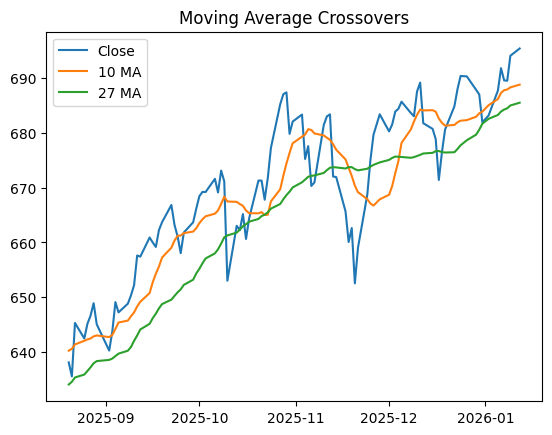

In [12]:

subsection = df.iloc[-100:, :]

plt.plot(subsection['Close'])
plt.plot(subsection[f'{FAST}_ma'])
plt.plot(subsection[f'{SLOW}_ma'])

plt.legend(['Close', f'{FAST} MA', f'{SLOW} MA'])
plt.title('Moving Average Crossovers')

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,MA,10_ma,27_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,
2022-02-25,414.076172,437.750000,437.839996,427.859985,429.609985,121804500,444.987950,436.104001,442.184078,-1.0,0.022064,-0.022064
2022-02-28,413.016815,436.630005,438.200012,430.700012,432.029999,145615000,445.119700,435.721002,441.624078,-1.0,0.019449,-0.019562
2022-03-01,406.726440,429.980011,437.170013,427.109985,435.040009,137785900,445.186700,434.817004,441.002967,-1.0,0.003923,-0.004630
2022-03-02,414.208679,437.890015,439.720001,431.570007,432.369995,117726500,445.298550,433.996005,440.999634,-1.0,0.022391,-0.022941
2022-03-03,412.146545,435.709991,441.109985,433.799988,440.470001,105501700,445.417400,432.907004,440.846671,-1.0,0.017301,-0.018076
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-06,691.809998,691.809998,692.320007,687.780029,687.929993,69273800,628.754400,687.295996,683.890001,1.0,0.615246,0.213790
2026-01-07,689.580017,689.580017,693.960022,689.320007,692.190002,75588300,629.382401,687.770996,684.256669,1.0,0.610040,0.209878
2026-01-08,689.510010,689.510010,690.619995,687.489990,688.820007,64019200,629.959550,687.925995,684.483335,1.0,0.609876,0.209755


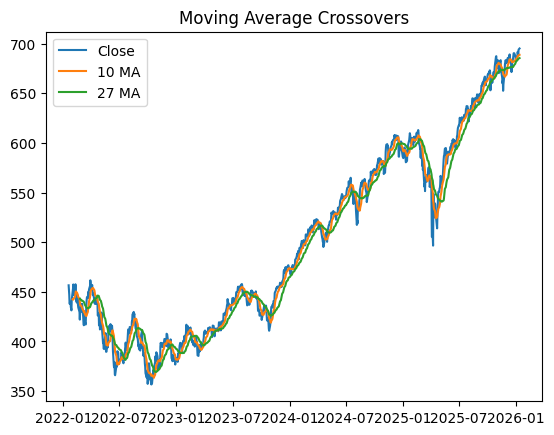

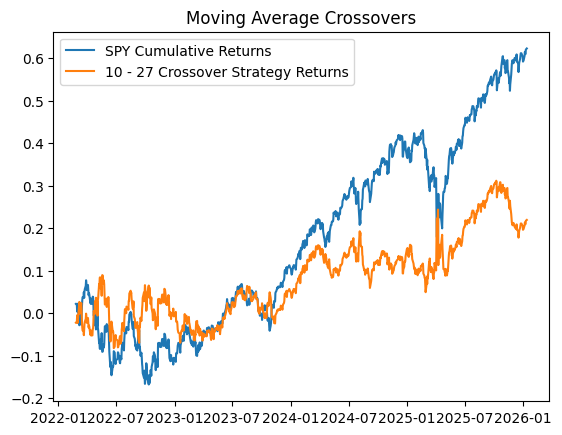

In [31]:
def main():
  df = get_data()
  df = add_moving_averages(df, FAST, SLOW)
  df = add_strategy(df, FAST, SLOW)
  df = test_strategy(df, TICKER, FAST, SLOW)
  return df

main()